In [1]:
import tensorflow as tf
# tf.enable_eager_execution()

In [15]:
from networks import sparse_auto_encoder
sae = sparse_auto_encoder(resolution=128, ae_dims=32, d_ch_dims=10, e_ch_dims=21, multiscale_count=1)

In [16]:
sae.summary(line_length=160)
# sae.encoder.summary()
# sae.decoder.summary()

Model: "SAE"
________________________________________________________________________________________________________________________________________________________________
Layer (type)                                                            Output Shape                                                    Param #                 
image (InputLayer)                                                      [(None, 128, 128, 3)]                                           0                       
________________________________________________________________________________________________________________________________________________________________
encoder (Model)                                                         (None, 16, 16, 32)                                              3166408                 
________________________________________________________________________________________________________________________________________________________________
decoder (Model)      

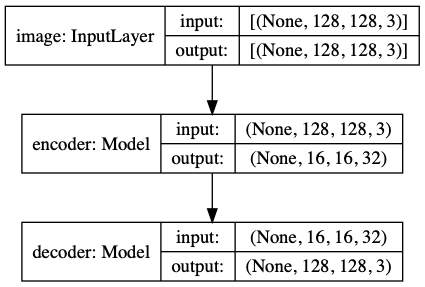

In [19]:
tf.keras.utils.plot_model(sae, show_shapes=True, show_layer_names=True)

In [20]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
mse_loss_fn = tf.keras.losses.MeanSquaredError()
loss_metric = tf.keras.metrics.Mean()

In [21]:
(x_train, _), _ = tf.keras.datasets.cifar10.load_data()
x_train = x_train.reshape(50000, 32, 32, 3).astype('float32') / 255
x_train = tf.image.resize_images(x_train, (128, 128))

In [22]:
train_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_dataset = train_dataset.shuffle(buffer_size=64).batch(4)

In [23]:
# # Iterate over epochs.
# for epoch in range(3):
#     print('Start of epoch %d' % (epoch,))
# 
#     # Iterate over the batches of the dataset.
#     for step, x_batch_train in enumerate(train_dataset):
#         with tf.GradientTape() as tape:
#             reconstructed = sae(x_batch_train)[-1]
#             print('Shape:', tf.shape(reconstructed))
#             # Compute reconstruction loss
#             loss = tf.reduce_mean(tf.square(reconstructed - x_batch_train))
#             # loss = mse_loss_fn(x_batch_train, reconstructed)
#             # loss += sum(sae.losses)
# 
#         grads = tape.gradient(loss, sae.trainable_weights)
#         optimizer.apply_gradients(zip(grads, sae.trainable_weights))
# 
#         loss_metric(loss)
# 
#         if step % 1 == 0:
#             print('step %s: mean loss = %s' % (step, loss_metric.result()))

Start of epoch 0
Shape: Tensor("Shape:0", shape=(3,), dtype=int32)
step 0: mean loss = Tensor("Identity_1:0", shape=(), dtype=float32)
Shape: Tensor("Shape_21:0", shape=(3,), dtype=int32)
step 1: mean loss = Tensor("Identity_3:0", shape=(), dtype=float32)
Shape: Tensor("Shape_42:0", shape=(3,), dtype=int32)
step 2: mean loss = Tensor("Identity_5:0", shape=(), dtype=float32)
Shape: Tensor("Shape_63:0", shape=(3,), dtype=int32)
step 3: mean loss = Tensor("Identity_7:0", shape=(), dtype=float32)
Shape: Tensor("Shape_84:0", shape=(3,), dtype=int32)
step 4: mean loss = Tensor("Identity_9:0", shape=(), dtype=float32)
Shape: Tensor("Shape_105:0", shape=(3,), dtype=int32)
step 5: mean loss = Tensor("Identity_11:0", shape=(), dtype=float32)
Shape: Tensor("Shape_126:0", shape=(3,), dtype=int32)
step 6: mean loss = Tensor("Identity_13:0", shape=(), dtype=float32)
Shape: Tensor("Shape_147:0", shape=(3,), dtype=int32)
step 7: mean loss = Tensor("Identity_15:0", shape=(), dtype=float32)
Shape: Tenso

KeyboardInterrupt: 

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

sae.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())
sae.fit(train_dataset, epochs=3)